In [1]:
import pandas as pd
import numpy as np

In [17]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas,sklearn
#import config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
data=pd.read_csv("music.txt")
data.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.451810,-0.784343,-0.381408,-0.691147,-0.093114,0.371373,-0.193567,-0.572264,-0.236668,-0.455356,...,-0.114378,-0.174782,-0.734013,0.379757,-0.826864,0.065192,-0.802478,0.337965,-0.644471,blues
1,-0.766532,-0.726759,-0.559681,-0.463433,-0.202180,0.294939,-0.145536,-0.414690,-0.333817,0.018836,...,0.103460,0.112254,-0.627408,0.466185,-0.771852,0.270596,-0.480038,0.389865,-0.579460,blues
2,-0.545253,-0.556617,-0.500726,-0.520669,0.128482,0.363542,-0.359306,-0.704373,-0.413241,-0.486896,...,-0.166338,-0.354216,-0.681266,0.180107,-0.752063,-0.094467,-0.647450,-0.175090,-0.563352,blues
3,-0.936791,-0.920130,-0.872967,-0.743929,-0.054768,0.059710,-0.644347,-0.596014,-0.772659,-0.550906,...,-0.747465,0.293044,-0.794058,0.104992,-0.926054,0.202960,-0.847504,-0.094634,-0.745549,blues
4,-0.118511,-0.400993,-0.236112,-0.243814,0.209286,0.290900,-0.317266,-0.532099,-0.198146,-0.129946,...,0.135571,-0.436034,-0.689106,-0.180337,-0.717713,0.166494,-0.222193,-0.397821,-0.306621,blues


In [4]:
#data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP', 'REGGAE']

number_of_rows,number_of_cols = data.shape
data[:5].style

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4,meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.45181,-0.784343,-0.381408,-0.691147,-0.0931141,0.371373,-0.193567,-0.572264,-0.236668,-0.455356,0.151288,-0.734165,-0.142672,-0.458952,0.286323,-0.543969,-0.127472,-0.543927,0.353179,-0.56626,-0.453191,-0.498744,0.455135,-0.220863,-0.306257,-0.394531,0.0908564,-0.114378,-0.174782,-0.734013,0.379757,-0.826864,0.0651917,-0.802478,0.337965,-0.644471,blues
1,-0.766532,-0.726759,-0.559681,-0.463433,-0.20218,0.294939,-0.145536,-0.41469,-0.333817,0.018836,0.0865551,-0.609341,0.296721,-0.224597,0.261529,-0.379317,0.212097,-0.245181,0.436715,-0.48145,-0.109102,0.835014,0.662994,-0.0824327,-0.0749604,0.315861,0.0673463,0.10346,0.112254,-0.627408,0.466185,-0.771852,0.270596,-0.480038,0.389865,-0.57946,blues
2,-0.545253,-0.556617,-0.500726,-0.520669,0.128482,0.363542,-0.359306,-0.704373,-0.413241,-0.486896,0.281628,-0.319524,-0.169322,-0.418214,0.121628,-0.505016,-0.3753,-0.379773,0.508914,-0.455881,-0.386862,-0.00441049,0.233059,0.401809,-0.285252,-0.558501,-0.141825,-0.166338,-0.354216,-0.681266,0.180107,-0.752063,-0.0944673,-0.64745,-0.17509,-0.563352,blues
3,-0.936791,-0.92013,-0.872967,-0.743929,-0.0547677,0.0597105,-0.644347,-0.596014,-0.772659,-0.550906,0.490271,-0.582568,0.199112,-0.473559,0.0113278,-0.68076,0.255872,-0.485204,0.0788462,-0.511825,0.243764,-0.484566,0.248491,-0.4121,0.362862,-0.513088,-0.030966,-0.747465,0.293044,-0.794058,0.104992,-0.926054,0.20296,-0.847504,-0.0946338,-0.745549,blues
4,-0.118511,-0.400993,-0.236112,-0.243814,0.209286,0.2909,-0.317266,-0.532099,-0.198146,-0.129946,0.0676723,0.0503651,-0.286025,-0.536535,-0.0118803,-0.327846,-0.822026,-0.351386,0.229164,-0.184887,-0.736596,-0.0564981,0.024575,0.295925,-0.456353,-0.0604168,-0.253022,0.135571,-0.436034,-0.689106,-0.180337,-0.717713,0.166494,-0.222193,-0.397821,-0.306621,blues


In [5]:
data.shape

(600, 37)

In [6]:
data

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.451810,-0.784343,-0.381408,-0.691147,-0.093114,0.371373,-0.193567,-0.572264,-0.236668,-0.455356,...,-0.114378,-0.174782,-0.734013,0.379757,-0.826864,0.065192,-0.802478,0.337965,-0.644471,blues
1,-0.766532,-0.726759,-0.559681,-0.463433,-0.202180,0.294939,-0.145536,-0.414690,-0.333817,0.018836,...,0.103460,0.112254,-0.627408,0.466185,-0.771852,0.270596,-0.480038,0.389865,-0.579460,blues
2,-0.545253,-0.556617,-0.500726,-0.520669,0.128482,0.363542,-0.359306,-0.704373,-0.413241,-0.486896,...,-0.166338,-0.354216,-0.681266,0.180107,-0.752063,-0.094467,-0.647450,-0.175090,-0.563352,blues
3,-0.936791,-0.920130,-0.872967,-0.743929,-0.054768,0.059710,-0.644347,-0.596014,-0.772659,-0.550906,...,-0.747465,0.293044,-0.794058,0.104992,-0.926054,0.202960,-0.847504,-0.094634,-0.745549,blues
4,-0.118511,-0.400993,-0.236112,-0.243814,0.209286,0.290900,-0.317266,-0.532099,-0.198146,-0.129946,...,0.135571,-0.436034,-0.689106,-0.180337,-0.717713,0.166494,-0.222193,-0.397821,-0.306621,blues
5,-0.701905,-0.901320,-0.711479,-0.733247,0.065971,-0.145018,-0.586959,-0.542007,-0.625424,-0.418621,...,-0.378960,-0.315085,-0.900818,-0.188148,-0.702720,-0.221397,-0.605031,-0.353575,-0.759647,blues
6,-0.575633,-0.667086,-0.497414,-0.341626,0.432527,0.070445,-0.531863,-0.392305,-0.393410,-0.208222,...,0.466579,-0.221649,-0.552622,-0.038557,-0.680505,-0.010024,-0.511683,-0.600442,-0.490825,blues
7,-0.685647,-0.886928,-0.552424,-0.731196,0.088831,0.079986,-0.364611,-0.687419,-0.421731,-0.541015,...,0.453486,-0.074035,-0.529450,-0.317226,-0.728229,0.185043,-0.172267,-0.445482,-0.609786,blues
8,-0.567845,-0.688393,-0.386585,-0.516244,0.210327,0.582331,-0.162794,-0.516733,-0.219502,-0.285884,...,-0.619759,-0.051751,-0.834414,0.272849,-0.779115,-0.352290,-0.634300,0.242108,-0.722842,blues
9,-0.463576,-0.676589,-0.302418,-0.461719,-0.001228,0.293723,-0.136879,-0.533250,-0.121163,-0.328090,...,-0.195343,-0.217760,-0.623558,0.222863,-0.650169,0.174272,-0.670705,-0.239103,-0.345680,blues


Let's split our dataset..

Then we seperate both train and test datasets into two part. One for feature columns, one for class column.

In [7]:
data.shape

(600, 37)

In [8]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data)

train, test = train_test_split(data_set_values, test_size = 0.010,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Train_x data size: {}".format(train_x.shape))
print("Train_y data size: {}".format(train_y.shape))
print("\r")
print("Test data size: {}".format(test.shape))
print("Test_x data size: {}".format(test_x.shape))
print("Test_y data size: {}".format(test_y.shape))

Training data size: (594, 37)
Train_x data size: (594, 36)
Train_y data size: (594,)

Test data size: (6, 37)
Test_x data size: (6, 36)
Test_y data size: (6,)


In [9]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

### KNN algorithm and its performance analysis

Max Accuracy is 1.000 on test dataset with 1 neighbors.

---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['reggae' 'metal' 'blues' 'classical' 'hiphop' 'pop']

Predicted Test dataset labels: 
['reggae' 'metal' 'blues' 'classical' 'blues' 'pop']
Training Score: 1.000
Test score: 1.000


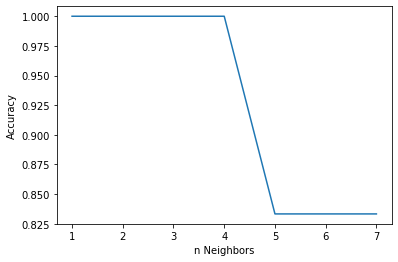

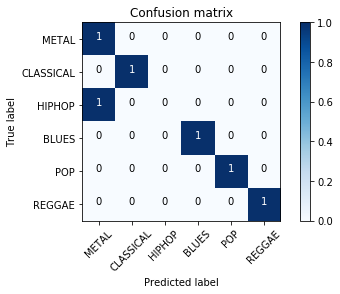

In [14]:
results_knn=[]
for i in range(1,8):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))


plt.plot(numpy.arange(1,8),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")

plot_cnf(knn,test_x,test_y,GENRES)

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)

print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))

print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  


### SVM Algarithm and its performance analysis

In [16]:
svc=SVC() #Default hyperparameters
svc.fit(train_x,train_y)
y_pred=svc.predict(test_x)
print('Accuracy Score:')
print(metrics.accuracy_score(test_y,y_pred)*100)

Accuracy Score:
83.33333333333334


c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
